# physics760 - Problem Set 4

### Team:
- Sumin Alff-Kim : 3282322
- Lennart Voorgang: 3124372

### Code
- [Repository](https://github.com/lennartvrg/ComputationalPhysics)
- [Subdirectory for this assignment](https://github.com/suminalffkim/lennartvrg/tree/main/4%20-%20The%20Ising%20Model%20in%201D)
- CommitID: **47011272599d9917f154dcca8960487cfa1eec39**

### Dependencies
- CMake 3.25+
- Thread building-blocks library. **ubuntu**: `sudo apt-get install libtbb-dev`. **macOS**: `brew install tbb` library.
- `c++23` comptabile compiler **macOS**: As the Apple version of clang does not support parallel algorithms, one must install `gcc` via homebrew: `brew install gcc`.

### Run the `c++` code
- `cd 4\ -\ The\ Ising\ Model\ in\ 1D/`
- `mkdir build && cd build`
- `cmake .. && make && cp main ..`
- `cd .. && ./main`
- You should now have an output directory with several `CSV` files within it

### Run the `python` code
- Create the environment with `python3 -m venv .venv`
- To active the environment run `source .venv/bin/active` (Linux)
- To Install the required dependencies run `pip install -r requirements.txt`
- Run `jupyter notebook`

In [7]:
# Standard imports for computational physics
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import typing
import scienceplots

# Pretty styling for graphs
plt.style.use(['science', 'grid', 'scatter', 'notebook'])
plt.rcParams["figure.figsize"] = (12, 8)

## The Ising Model in 1D

<font color='blue'> **Q. As written there are three dimensionful parameters, J, h, and β = 1/T . Find a set of TWO dimensionless parameters and rewrite the exact result (4) in terms of those variables.**</font>

<font color='blue'> **Q. The expected net magnetization $M$ (which is already dimensionless) is given by $\langle M \rangle =\frac{\partial}{\partial h} \log{Z[\beta, J, H]}$. Derive an expression for $\langle M \rangle$ in terms of your $2$ chosen dimensionless variables by actually differentiating $Z$. You don’t have to get it to as simple a form as possible, but make sure it’s simple enough to easily program as a function of your $2$ dimensionless variables.**</font>

For $\langle M \rangle$ we get
\begin{align}
    \langle M \rangle &= T\frac{\partial}{\partial h}  logZ[β,J,h]\\
        &= \frac{1}{\beta}\frac{\partial}{\partial h}  logZ[β,J,h]\\
        &= \frac{1}{\beta}\frac{1}{Z[β,J,h]}\frac{\partial Z[β,J,h]}{\partial h}
\end{align}

Solving the term with $Z$ and $\lambda_\pm$
\begin{align}
    \frac{∂Z[β,J,h]}{∂h} &=N\left(λ_+^{N−1}\frac{∂λ_+}{∂h} +λ_-^{N−1}\frac{∂λ_-}{∂h} \right)\\
​           \frac{∂λ_\pm}{∂h}&=e^{\beta J}\left(sinh\left(\frac{h}{T}\right)\cdot \frac{1}{T}\pm \frac{sinh(h/T)cosh(h/T)}{\sqrt{sinh^2(h/T)+e^{-4\beta J}}}\cdot \frac{1}{T}\right)\\
&=e^{\beta J}\left(sinh\left(h\beta\right)\cdot\beta\pm \frac{sinh(h\beta)cosh(h\beta)}{\sqrt{sinh^2(h\beta)+e^{-4\beta J}}}\cdot \beta\right)
\end{align}

Putting it back into the first expression and using our $2$ dimensionless parameters
\begin{align}
⟨M⟩&=\frac{1}{\beta}\cdot \frac{N\left(λ_+^{N−1} \frac{∂λ_+}{∂h} +λ_-^{N−1}\frac{∂λ_-}{∂h} \right)}{λ_+^N+λ_-^N}
\end{align}

<font color='blue'>**Q. On a single figure plot $\langle  m = M/N\rangle$ (using the expression you just found) for $J = 0.75$, $\beta = 1$ for $h \in [−1, +1]$ for $N \in {1, 2, 4, 8, 16, \infty}$ using what you found for $\langle M \rangle$ in the previous part and the exact $m$.**</font>

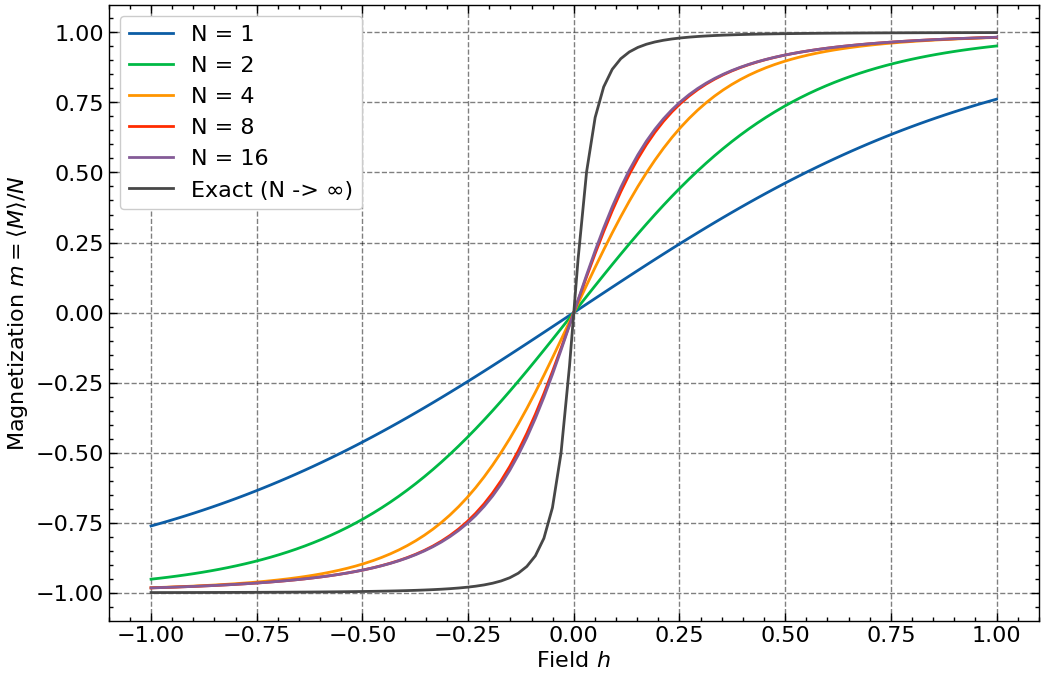

In [11]:
def exact_m(h, T, J):
    return np.sinh(h/T) / np.sqrt((np.sinh(h/T))**2 + np.exp(-4*J/T))

def lambda_plus(h, J, T):
    return np.exp(J / T) * (np.cosh(h / T) + np.sqrt(np.sinh(h / T)**2 + np.exp(-4 * J / T)))

def lambda_minus(h, J, T):
    return np.exp(J / T) * (np.cosh(h / T) -np.sqrt(np.sinh(h / T)**2 + np.exp(-4 * J / T)))

def del_lambda_plus(h, J, T):
    sinhTerm=np.sinh(h/T)
    coshTerm=np.cosh(h/T)
    return np.exp(J/T) * (sinhTerm / T + (1 / T * sinhTerm * coshTerm / np.sqrt(sinhTerm**2 + np.exp(-4 * J / T))))

def del_lambda_minus(h, J, T):
    sinhTerm=np.sinh(h/T)
    coshTerm=np.cosh(h/T)
    return np.exp(J/T)*(sinhTerm/T-(1/T*sinhTerm*coshTerm/np.sqrt(sinhTerm**2+np.exp(-4*J/T))))

def magnetization_per_spin_finite_N(h, J, T, N):
    numerator=N*(lambda_plus(h,J,T)**(N-1) * del_lambda_plus(h,J,T) + lambda_minus(h,J,T)**(N-1) * del_lambda_minus(h,J,T))
    denominator=lambda_plus(h,J,T)**N + lambda_minus(h,J,T)**N
    return T * (numerator / denominator)


J=0.75
beta=1
T=1/beta
N_values=[1, 2, 4, 8, 16, np.inf]

h_values=np.linspace(-1,1,100)
fig, ax = plt.subplots()

# ax.plot(h_values, exact_m(h_values,T,J), label=f'exact')
for N in [1, 2, 4, 8, 16, np.inf]:
    magnetizations = [magnetization_per_spin_finite_N(h, J, T, N) / N if N != np.inf else exact_m(h, J, T)
                      for h in h_values]
    label = f"N = {N}" if N != np.inf else "Exact (N -> ∞)"
    plt.plot(h_values, magnetizations, '-', label=label)
plt.xlabel("Field $h$")
plt.ylabel("Magnetization $m = \\langle M \\rangle / N$")
ax.legend()
plt.grid(True)

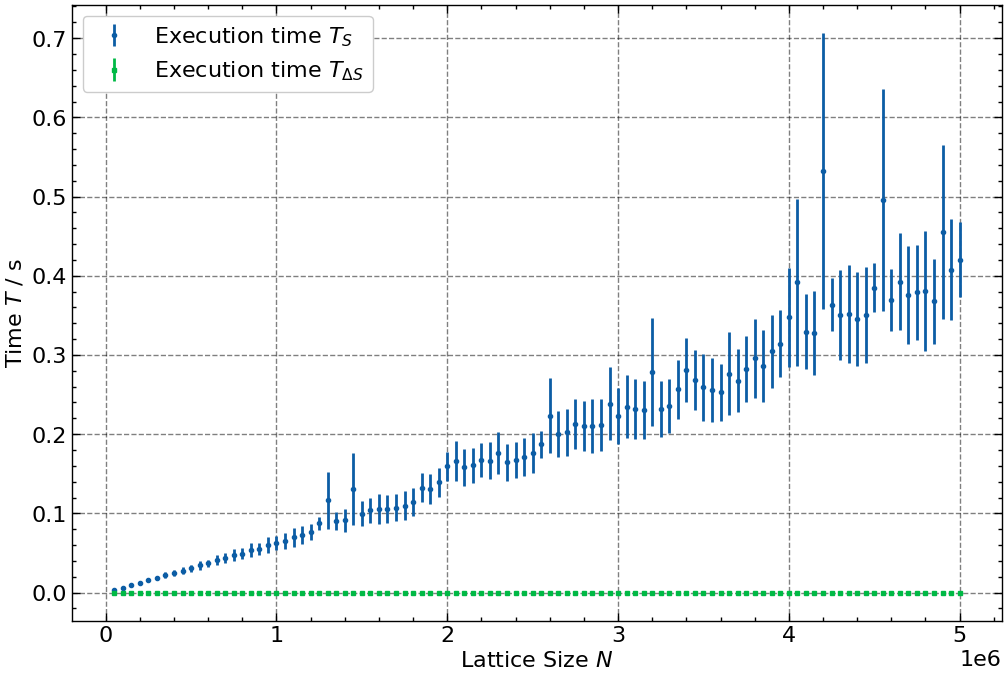

In [9]:
lattice_scaling_data = pd.read_csv('output/lattice_scaling.csv')
fig, ax = plt.subplots()

ax.errorbar(lattice_scaling_data['Lattice'], lattice_scaling_data['Action'] * 10**(-9), yerr=lattice_scaling_data['DeltaAction'] * 10**(-9), label='Execution time $T_S$')
ax.errorbar(lattice_scaling_data['Lattice'], lattice_scaling_data['DiffAction'] * 10**(-9), yerr=lattice_scaling_data['DeltaDiffAction'] * 10**(-9), label='Execution time $T_{\\Delta S}$')

ax.set_xlabel('Lattice Size $N$')
ax.set_ylabel('Time $T$ / s')

ax.legend(loc='upper left')

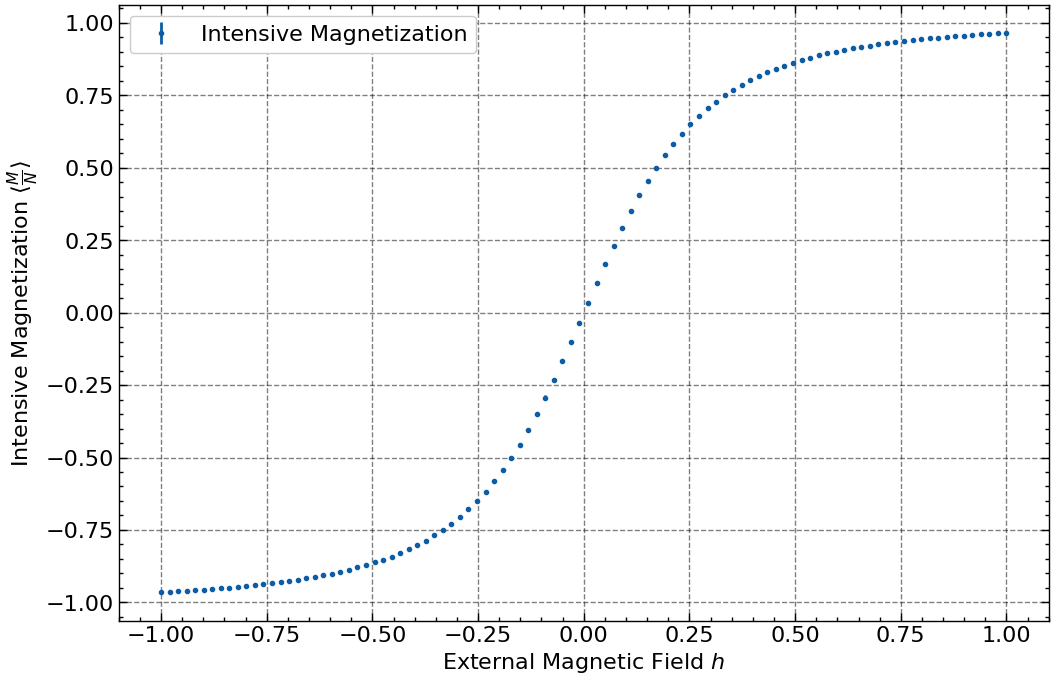

In [12]:
def test(h):
    beta = 1
    j = 1
    return np.sinh(h * beta) / np.sqrt(np.sinh(h * beta)**2 * np.exp(-4 * j * beta))


#sampling = np.linspace(-1, 1, num=100);
#plt.errorbar(sampling, test(sampling))

data = pd.read_csv('output/metropolis.csv')
plt.errorbar(data['h'], data['magnetization'], yerr=data['delta_magnetization'], label='Intensive Magnetization')

plt.xlabel('External Magnetic Field $h$')
plt.ylabel('Intensive Magnetization $\\langle \\frac{M}{N} \\rangle$')
plt.legend()

plt.savefig('output/magnetization.pdf', dpi=600, bbox_inches='tight')